A study investigates different methods to boost performance of neural networks when performing sentiment analysis on IMDb dataset data. Model optimization requires different approaches that modify architecture designs alongside function improvement and regularization technique application.

**Architectural Adjustments**
The study examines the impact that changing hidden layer numbers has on modeling outcomes. The model performance benefits from both the number of hidden layers and the units present within these layers.

**Functional Modifications**
The experimental studies to determine how loss functions affect model accuracy levels and running speed during the training process. Selecting alternative activation functions results in better nonlinearity which leads to a more efficient learning process.

**Regularization Techniques**
The regularization strategy incorporates dropout techniques which solve both overfitting problems and generalization tasks.

A total of 50,000 movie reviews from IMDb have been equally distributed between negative and positive expressions. The system conducts training operations on 25,000 reviews before testing with the other 25,000.

The study analyzes systematic modifications of neural networks to discover the best configuration which improves sentiment detection accuracy in movie reviews.


In [1]:
from numpy.random import seed
seed(123)
from tensorflow.keras.datasets import imdb
(tr_set, tr_labels), (te_set, te_labels) = imdb.load_data(
    num_words=10000)

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [2]:
tr_set

array([list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]),
       list([1, 194, 1153, 194, 8255, 78, 228,

In [3]:
tr_labels[0]

1

In [4]:
len(tr_labels)

25000

In [5]:
te_set

array([list([1, 591, 202, 14, 31, 6, 717, 10, 10, 2, 2, 5, 4, 360, 7, 4, 177, 5760, 394, 354, 4, 123, 9, 1035, 1035, 1035, 10, 10, 13, 92, 124, 89, 488, 7944, 100, 28, 1668, 14, 31, 23, 27, 7479, 29, 220, 468, 8, 124, 14, 286, 170, 8, 157, 46, 5, 27, 239, 16, 179, 2, 38, 32, 25, 7944, 451, 202, 14, 6, 717]),
       list([1, 14, 22, 3443, 6, 176, 7, 5063, 88, 12, 2679, 23, 1310, 5, 109, 943, 4, 114, 9, 55, 606, 5, 111, 7, 4, 139, 193, 273, 23, 4, 172, 270, 11, 7216, 2, 4, 8463, 2801, 109, 1603, 21, 4, 22, 3861, 8, 6, 1193, 1330, 10, 10, 4, 105, 987, 35, 841, 2, 19, 861, 1074, 5, 1987, 2, 45, 55, 221, 15, 670, 5304, 526, 14, 1069, 4, 405, 5, 2438, 7, 27, 85, 108, 131, 4, 5045, 5304, 3884, 405, 9, 3523, 133, 5, 50, 13, 104, 51, 66, 166, 14, 22, 157, 9, 4, 530, 239, 34, 8463, 2801, 45, 407, 31, 7, 41, 3778, 105, 21, 59, 299, 12, 38, 950, 5, 4521, 15, 45, 629, 488, 2733, 127, 6, 52, 292, 17, 4, 6936, 185, 132, 1988, 5304, 1799, 488, 2693, 47, 6, 392, 173, 4, 2, 4378, 270, 2352, 4, 1500, 7, 

In [6]:
te_labels[0]

0

In [7]:
max([max(seq) for seq in te_set])

9999

## ** Reviews to text**

In [12]:
word_to_index = imdb.get_word_index()
index_to_word_map = dict(
    [(value, key) for (key, value) in word_to_index.items()])
review_text = " ".join(
    [index_to_word_map.get(i - 3, "?") for i in tr_set[0]])

1641221/1641221 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [13]:
review_text

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

## **Data preparation**

In [14]:
import numpy as np
def transform_input_sequences(input_sequences, vocab_size=10000):
    binary_matrix = np.zeros((len(input_sequences), vocab_size))
    for i, sequence in enumerate(input_sequences):
        for j in sequence:
            binary_matrix[i, j] = 1.
    return binary_matrix

## **Data Vectorization**

In [15]:
train_dataset_1 = transform_input_sequences(tr_set)
test_dataset_1 = transform_input_sequences(te_set)

In [16]:
train_dataset_1[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [17]:
test_dataset_1[0]

array([0., 1., 1., ..., 0., 0., 0.])

## **Label Vectorization**

In [18]:
train_dataset_2 = np.asarray(tr_labels).astype("float32")
test_data_2 = np.asarray(te_labels).astype("float32")

## **Building model using relu and compiling it**

In [19]:
from tensorflow import keras
from tensorflow.keras import layers
seed(123)
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

In [20]:
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

In [21]:
seed(123)
x_validation = train_dataset_1[:10000]
partial_train_dataset_1 = train_dataset_1[10000:]
y_val = train_dataset_2[:10000]
partial_train_dataset_2 = train_dataset_2[10000:]

In [22]:
seed(123)
history = model.fit(partial_train_dataset_1,
                    partial_train_dataset_2,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_validation, y_val))

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 59ms/step - accuracy: 0.6972 - loss: 0.5965 - val_accuracy: 0.8536 - val_loss: 0.3964
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.8935 - loss: 0.3332 - val_accuracy: 0.8841 - val_loss: 0.3086
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.9250 - loss: 0.2390 - val_accuracy: 0.8892 - val_loss: 0.2833
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.9394 - loss: 0.1891 - val_accuracy: 0.8767 - val_loss: 0.3058
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.9462 - loss: 0.1613 - val_accuracy: 0.8886 - val_loss: 0.2852
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.9585 - loss: 0.1343 - val_accuracy: 0.8836 - val_loss: 0.2886
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9665 - loss: 0.1156 - val_accuracy: 0.8759 - val_loss: 0.3176
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.9733 - loss: 0.0973 - val_accuracy: 0.8839 - v

The initial training phase resulted in a loss of 0.5965 with an accuracy of 69.72% on the training data, while the validation data showed a loss of 0.3964 and an accuracy of 85.36%.

As training progressed, the model's accuracy on the training data steadily improved, reaching 99.96% with a loss of 0.0119 by Epoch 20. However, the validation accuracy declined to 85.64%, with an increased loss of 0.6180, indicating overfitting. The model demonstrated strong learning on the training set but struggled to generalize effectively to new data.

In [23]:
history__data = history.history
history__data.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

## **Plotting the training and validation loss**

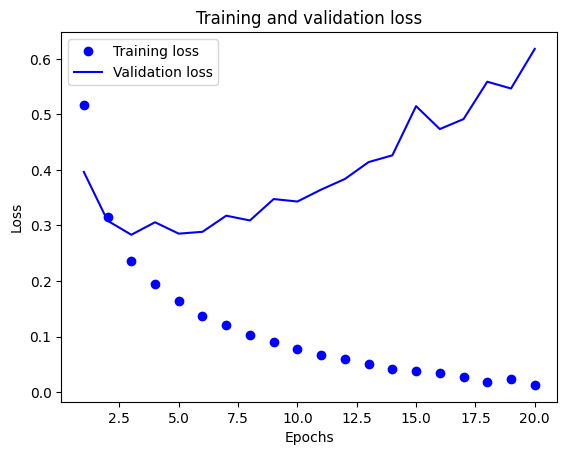

In [24]:
import matplotlib.pyplot as plt
history__data = history.history
loss_values = history__data["loss"]
val_loss_values = history__data["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

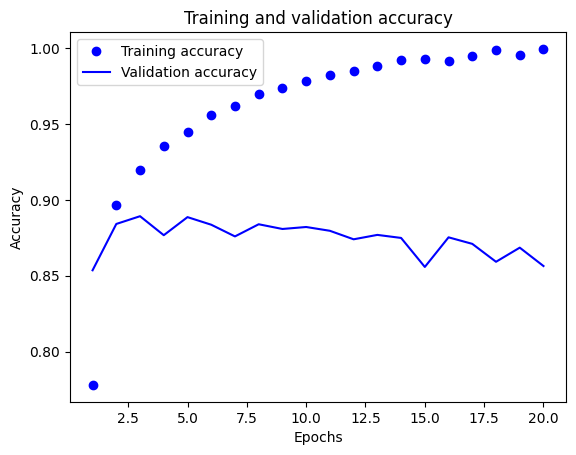

In [25]:
plt.clf()
acc = history__data["accuracy"]
val_acc = history__data["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

**The graphs indicate overfitting, as training loss continuously decreases while validation loss rises after a few epochs. Despite achieving near 100% training accuracy, the fluctuating validation accuracy suggests poor generalization, requiring techniques like regularization or early stopping to improve performance.**

## **Retraining the model**

In [26]:
np.random.seed(123)
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model.fit(train_dataset_1, train_dataset_2, epochs=4, batch_size=512)
binary_matrix = model.evaluate(test_dataset_1, test_data_2)

Epoch 1/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.7353 - loss: 0.5362
Epoch 2/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.9105 - loss: 0.2576
Epoch 3/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9331 - loss: 0.1979
Epoch 4/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.9405 - loss: 0.1678
782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8807 - loss: 0.2969


In [27]:
binary_matrix

[0.2942996621131897, 0.8832799792289734]

**During testing of the neural network model it reached 88.32% accuracy with 0.2942 loss. The model applies successfully to new data points despite continuing signs of overfitting from its training results.**

In [28]:
model.predict(test_dataset_1)

782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


array([[0.18455303],
       [0.9998895 ],
       [0.8151574 ],
       ...,
       [0.10875935],
       [0.06385516],
       [0.70870835]], dtype=float32)

## **Building a neural network with 1 hidden layer**

In [29]:
seed(123)
model1 = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

model1.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

x_validation = train_dataset_1[:10000]
partial_train_dataset_1 = train_dataset_1[10000:]

y_val = train_dataset_2[:10000]
partial_train_dataset_2 = train_dataset_2[10000:]


history1 = model1.fit(partial_train_dataset_1,
                    partial_train_dataset_2,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_validation, y_val))

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - accuracy: 0.7170 - loss: 0.5882 - val_accuracy: 0.8568 - val_loss: 0.4191
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - accuracy: 0.8828 - loss: 0.3736 - val_accuracy: 0.8650 - val_loss: 0.3594
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9085 - loss: 0.2890 - val_accuracy: 0.8860 - val_loss: 0.3067
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.9231 - loss: 0.2426 - val_accuracy: 0.8829 - val_loss: 0.2961
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9330 - loss: 0.2093 - val_accuracy: 0.8892 - val_loss: 0.2794
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.9443 - loss: 0.1850 - val_accuracy: 0.8822 - val_loss: 0.2913
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9490 - loss: 0.1661 - val_accuracy: 0.8885 - val_loss: 0.2764
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.9565 - loss: 0.1484 - val_accuracy: 0.8851 - v

In [30]:
history_dict = history1.history
history_dict.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

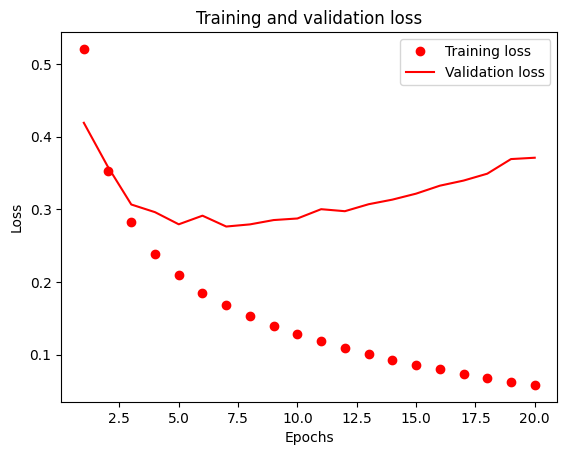

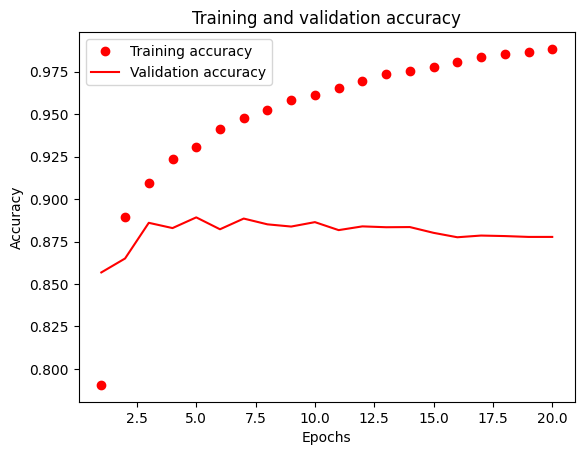

In [31]:
import matplotlib.pyplot as plt
history_dict = history1.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
#Plotting graph between Training and Validation loss
plt.plot(epochs, loss_values, "ro", label="Training loss")
plt.plot(epochs, val_loss_values, "r", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

#Plotting graph between Training and Validation Accuracy
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "ro", label="Training accuracy")
plt.plot(epochs, val_acc, "r", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [32]:
np.random.seed(123)
model1 = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

model1.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model1.fit(train_dataset_1, train_dataset_2, epochs=5, batch_size=512)
binary_matrix1 = model1.evaluate(test_dataset_1, test_data_2)

Epoch 1/5
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.7498 - loss: 0.5409
Epoch 2/5
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.8973 - loss: 0.3006
Epoch 3/5
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.9206 - loss: 0.2333
Epoch 4/5
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.9295 - loss: 0.2037
Epoch 5/5
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.9401 - loss: 0.1801
782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8855 - loss: 0.2820


In [33]:
binary_matrix1

[0.2800644040107727, 0.8880400061607361]

**The test set achieved a loss of 0.280 and an accuracy of 88.80%.**

In [34]:
model1.predict(test_dataset_1)

782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


array([[0.24095112],
       [0.99988824],
       [0.8748426 ],
       ...,
       [0.11667909],
       [0.09097715],
       [0.63858324]], dtype=float32)

**Creating a neural network with three hidden layers**

In [35]:
np.random.seed(123)
model_3 = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model_3.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
x_validation = train_dataset_1[:10000]
partial_train_dataset_1 = train_dataset_1[10000:]

y_val = train_dataset_2[:10000]
partial_train_dataset_2 = train_dataset_2[10000:]

history3 = model_3.fit(partial_train_dataset_1,
                    partial_train_dataset_2,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_validation, y_val))

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - accuracy: 0.6840 - loss: 0.6369 - val_accuracy: 0.8239 - val_loss: 0.4534
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.8816 - loss: 0.3782 - val_accuracy: 0.8764 - val_loss: 0.3317
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9195 - loss: 0.2575 - val_accuracy: 0.8835 - val_loss: 0.2993
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.9419 - loss: 0.1914 - val_accuracy: 0.8263 - val_loss: 0.4453
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.9450 - loss: 0.1720 - val_accuracy: 0.8693 - val_loss: 0.3442
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9592 - loss: 0.1347 - val_accuracy: 0.8846 - val_loss: 0.3016
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.9676 - loss: 0.1074 - val_accuracy: 0.8818 - val_loss: 0.3297
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.9747 - loss: 0.0885 - val_accuracy: 0.8789 - v

In [36]:
history_dict3 = history3.history
history_dict3.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

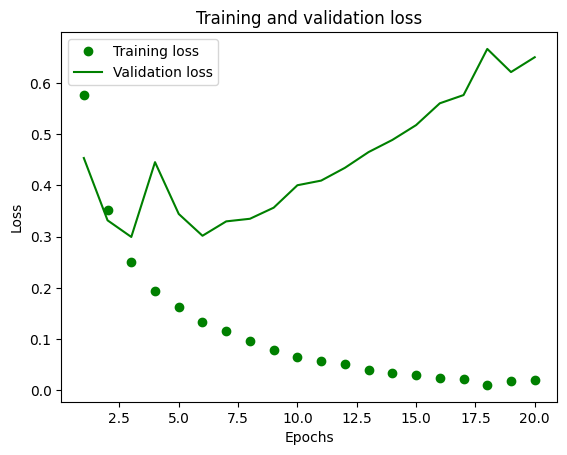

In [37]:
loss_values = history_dict3["loss"]
val_loss_values = history_dict3["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "go", label="Training loss")
plt.plot(epochs, val_loss_values, "g", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

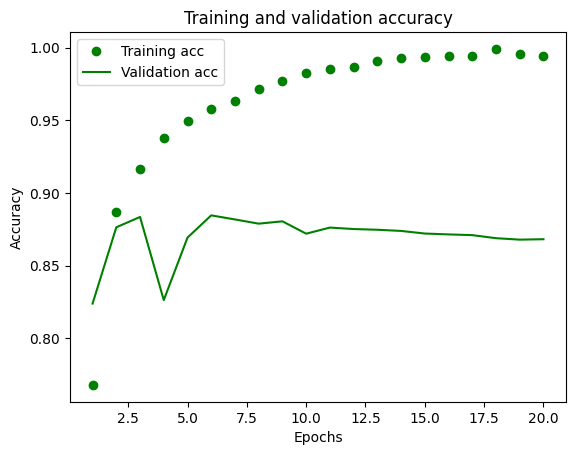

In [38]:
plt.clf()
acc = history_dict3["accuracy"]
val_acc = history_dict3["val_accuracy"]
plt.plot(epochs, acc, "go", label="Training acc")
plt.plot(epochs, val_acc, "g", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [39]:
np.random.seed(123)
model_3 = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])


model_3.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model_3.fit(train_dataset_1, train_dataset_2, epochs=3, batch_size=512)
binary_matrix_3 = model_3.evaluate(test_dataset_1, test_data_2)


Epoch 1/3
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.7149 - loss: 0.5935
Epoch 2/3
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.8970 - loss: 0.3017
Epoch 3/3
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.9252 - loss: 0.2189
782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8836 - loss: 0.2916


**The test set has a loss of 0.29 and an accuracy of 88.36%.**

In [40]:
binary_matrix_3

[0.2881566286087036, 0.8846399784088135]

In [41]:
model_3.predict(test_dataset_1)

782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


array([[0.29381514],
       [0.9993426 ],
       [0.9373727 ],
       ...,
       [0.15358119],
       [0.12072782],
       [0.6303163 ]], dtype=float32)

### **Building Neural Network with 32 units.**

In [42]:
np.random.seed(123)
model_32 = keras.Sequential([
    layers.Dense(32, activation="relu"),
    layers.Dense(32, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
#model compilation
model_32.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
#model validation
x_validation = train_dataset_1[:10000]
partial_train_dataset_1 = train_dataset_1[10000:]

y_val = train_dataset_2[:10000]
partial_train_dataset_2 = train_dataset_2[10000:]

np.random.seed(123)
history32 = model_32.fit(partial_train_dataset_1,
                    partial_train_dataset_2,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_validation, y_val))

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step - accuracy: 0.6914 - loss: 0.5997 - val_accuracy: 0.8241 - val_loss: 0.4183
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.8871 - loss: 0.3291 - val_accuracy: 0.8771 - val_loss: 0.3177
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.9173 - loss: 0.2379 - val_accuracy: 0.8863 - val_loss: 0.2857
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.9324 - loss: 0.1975 - val_accuracy: 0.8792 - val_loss: 0.3042
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.9490 - loss: 0.1601 - val_accuracy: 0.8821 - val_loss: 0.2922
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9595 - loss: 0.1288 - val_accuracy: 0.8847 - val_loss: 0.2934
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9657 - loss: 0.1106 - val_accuracy: 0.8840 - val_loss: 0.3065
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.9726 - loss: 0.0924 - val_accuracy: 0.8740 - v

In [43]:
hyper_model_history_dict = history32.history
hyper_model_history_dict.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

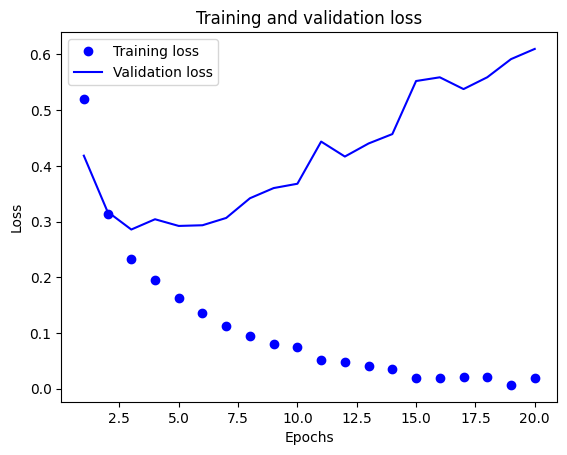

In [44]:
loss_values = hyper_model_history_dict["loss"]
val_loss_values = hyper_model_history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

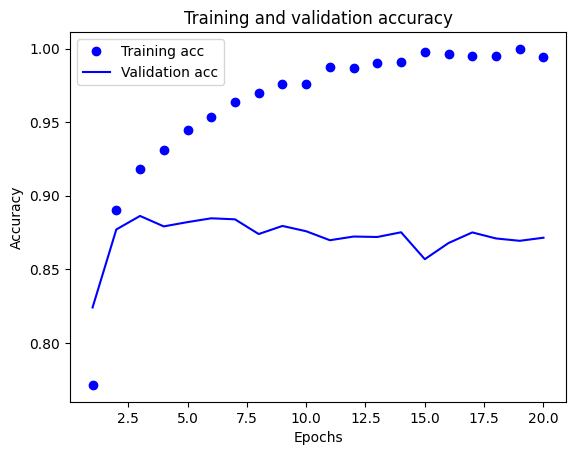

In [45]:
plt.clf()
acc = hyper_model_history_dict["accuracy"]
val_acc = hyper_model_history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [46]:
history_32 = model_32.fit(train_dataset_1, train_dataset_2, epochs=3, batch_size=12)
final_result_32 = model_32.evaluate(test_dataset_1, test_data_2)
print(final_result_32)

Epoch 1/3
2084/2084 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9316 - loss: 0.2236
Epoch 2/3
2084/2084 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.9411 - loss: 0.1628
Epoch 3/3
2084/2084 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9544 - loss: 0.1357
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8695 - loss: 0.4482
[0.4485381543636322, 0.8711199760437012]


In [47]:
model_32.predict(test_dataset_1)

782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


array([[0.04204874],
       [1.        ],
       [0.6628257 ],
       ...,
       [0.03195171],
       [0.01308174],
       [0.24813423]], dtype=float32)

**Training the model with 64 units**

In [48]:
np.random.seed(123)
model_64 = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model_64.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
# validation
x_validation = train_dataset_1[:10000]
partial_train_dataset_1 = train_dataset_1[10000:]

y_val = train_dataset_2[:10000]
partial_train_dataset_2 = train_dataset_2[10000:]

np.random.seed(123)
history64 = model_64.fit(partial_train_dataset_1,
                    partial_train_dataset_2,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_validation, y_val))

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 61ms/step - accuracy: 0.6616 - loss: 0.5971 - val_accuracy: 0.8699 - val_loss: 0.3443
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 58ms/step - accuracy: 0.8741 - loss: 0.3211 - val_accuracy: 0.8793 - val_loss: 0.2973
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 105ms/step - accuracy: 0.9137 - loss: 0.2288 - val_accuracy: 0.8893 - val_loss: 0.2729
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 58ms/step - accuracy: 0.9318 - loss: 0.1806 - val_accuracy: 0.8803 - val_loss: 0.2987
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - accuracy: 0.9487 - loss: 0.1450 - val_accuracy: 0.8850 - val_loss: 0.2961
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.9616 - loss: 0.1136 - val_accuracy: 0.8781 - val_loss: 0.3345
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.9719 - loss: 0.0886 - val_accuracy: 0.8842 - val_loss: 0.3219
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step - accuracy: 0.9768 - loss: 0.0737 - val_accuracy: 0.8829 - 

In [49]:
history_dict64 = history64.history
history_dict64.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

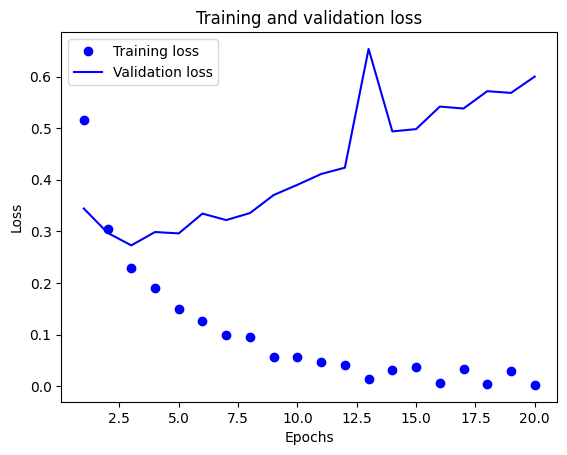

In [50]:
loss_values = history_dict64["loss"]
val_loss_values = history_dict64["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

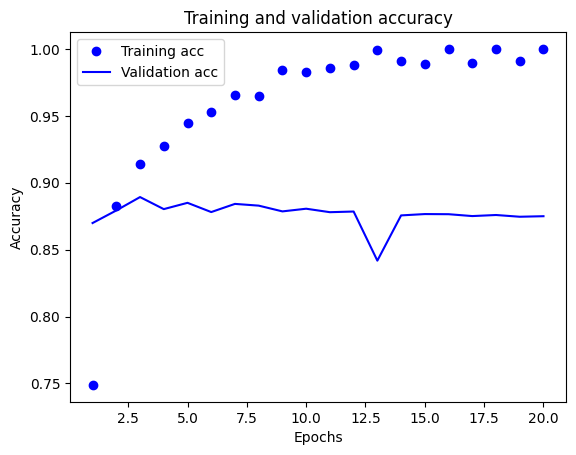

In [51]:
plt.clf()
acc = history_dict64["accuracy"]
val_acc = history_dict64["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


In [52]:
history_64 = model_64.fit(train_dataset_1, train_dataset_2, epochs=3, batch_size=512)
binary_matrix_64 = model_64.evaluate(test_dataset_1, test_data_2)
binary_matrix_64

Epoch 1/3
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - accuracy: 0.9434 - loss: 0.2062
Epoch 2/3
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.9731 - loss: 0.0895
Epoch 3/3
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - accuracy: 0.9850 - loss: 0.0558
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8684 - loss: 0.4019


[0.4005260467529297, 0.8715199828147888]

In [53]:
model_64.predict(test_dataset_1)

782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step


array([[0.0133222 ],
       [0.9999998 ],
       [0.49194503],
       ...,
       [0.01720217],
       [0.01750094],
       [0.9095838 ]], dtype=float32)


**The test set, the accuracy dropped to 87.15% with a higher loss of 0.4005**

### **Training the model with 128 units**

In [54]:
np.random.seed(123)
model_128 = keras.Sequential([
    layers.Dense(128, activation="relu"),
    layers.Dense(128, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model_128.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
# validation
x_validation = train_dataset_1[:10000]
partial_train_dataset_1 = train_dataset_1[10000:]

y_val = train_dataset_2[:10000]
partial_train_dataset_2 = train_dataset_2[10000:]

np.random.seed(123)
history128 = model_128.fit(partial_train_dataset_1,
                    partial_train_dataset_2,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_validation, y_val))

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 85ms/step - accuracy: 0.6779 - loss: 0.5957 - val_accuracy: 0.8525 - val_loss: 0.3694
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 65ms/step - accuracy: 0.8862 - loss: 0.3044 - val_accuracy: 0.8477 - val_loss: 0.3518
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 81ms/step - accuracy: 0.9106 - loss: 0.2322 - val_accuracy: 0.8780 - val_loss: 0.3035
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 66ms/step - accuracy: 0.9385 - loss: 0.1730 - val_accuracy: 0.8861 - val_loss: 0.2752
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 65ms/step - accuracy: 0.9578 - loss: 0.1296 - val_accuracy: 0.8819 - val_loss: 0.3029
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 64ms/step - accuracy: 0.9679 - loss: 0.1046 - val_accuracy: 0.8640 - val_loss: 0.3683
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 57ms/step - accuracy: 0.9740 - loss: 0.0868 - val_accuracy: 0.8816 - val_loss: 0.3310
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 78ms/step - accuracy: 0.9836 - loss: 0.0590 - val_accuracy: 0.8492 - v

In [55]:
history_dict128 = history128.history
history_dict128.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

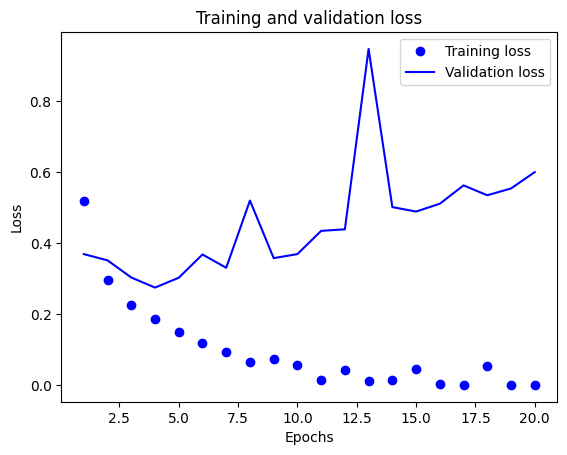

In [56]:
loss_values = history_dict128["loss"]
val_loss_values = history_dict128["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

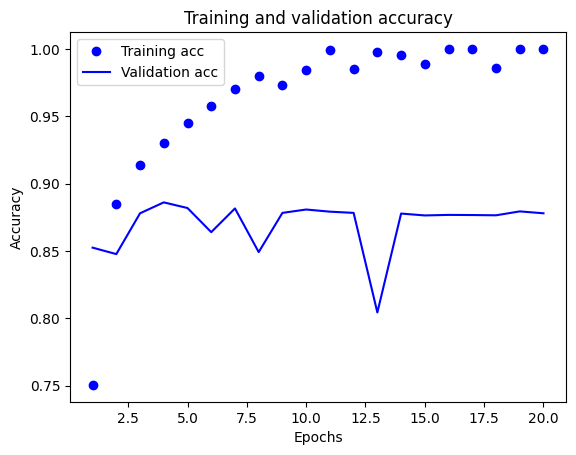

In [57]:
plt.clf()
acc = history_dict128["accuracy"]
val_acc = history_dict128["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [58]:
history_128 = model_128.fit(train_dataset_1, train_dataset_2, epochs=2, batch_size=512)
binary_matrix_128 = model_128.evaluate(test_dataset_1, test_data_2)
binary_matrix_128

Epoch 1/2
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - accuracy: 0.9381 - loss: 0.2200
Epoch 2/2
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - accuracy: 0.9775 - loss: 0.0783
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8657 - loss: 0.3741


[0.37036311626434326, 0.8686800003051758]

In [59]:
model_128.predict(test_dataset_1)

782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step


array([[0.01722546],
       [0.9999987 ],
       [0.7190469 ],
       ...,
       [0.10129648],
       [0.01521256],
       [0.95121455]], dtype=float32)

**The validation set has an accuracy of 86.86%.**

### **MSE Loss Function**




In [60]:
np.random.seed(123)
model_MSE = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
#Model compilation
model_MSE.compile(optimizer="rmsprop",
              loss="mse",
              metrics=["accuracy"])
# validation
x_validation = train_dataset_1[:10000]
partial_train_dataset_1 = train_dataset_1[10000:]

y_val = train_dataset_2[:10000]
partial_train_dataset_2 = train_dataset_2[10000:]
# Model Fit
np.random.seed(123)
history_model_MSE = model_MSE.fit(partial_train_dataset_1,
                    partial_train_dataset_2,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_validation, y_val))

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - accuracy: 0.6701 - loss: 0.2236 - val_accuracy: 0.8344 - val_loss: 0.1500
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.8743 - loss: 0.1285 - val_accuracy: 0.8778 - val_loss: 0.1095
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.9057 - loss: 0.0915 - val_accuracy: 0.8769 - val_loss: 0.0978
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.9200 - loss: 0.0726 - val_accuracy: 0.8733 - val_loss: 0.0962
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.9319 - loss: 0.0618 - val_accuracy: 0.8822 - val_loss: 0.0880
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.9424 - loss: 0.0541 - val_accuracy: 0.8873 - val_loss: 0.0838
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.9509 - loss: 0.0473 - val_accuracy: 0.8857 - val_loss: 0.0835
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.9615 - loss: 0.0402 - val_accuracy: 0.8744 - v

In [61]:
history_dict_MSE = history_model_MSE.history
history_dict_MSE.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

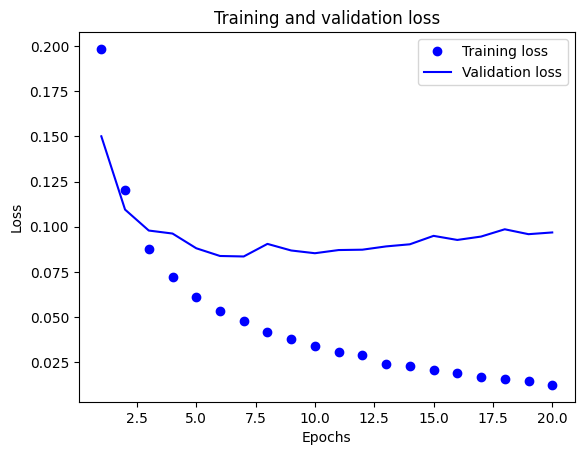

In [62]:
import matplotlib.pyplot as plt
loss_values = history_dict_MSE["loss"]
val_loss_values = history_dict_MSE["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

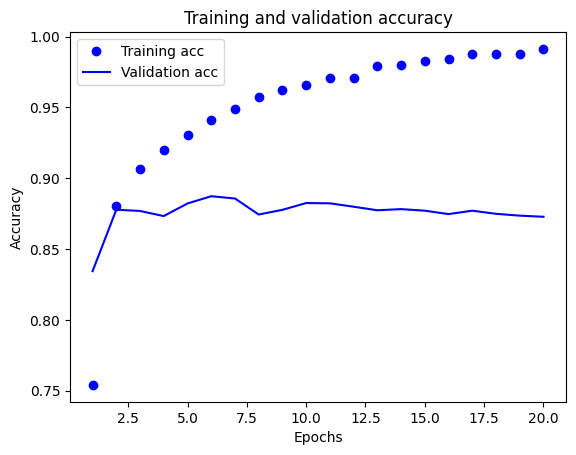

In [63]:
plt.clf()
acc = history_dict_MSE["accuracy"]
val_acc = history_dict_MSE["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [64]:
model_MSE.fit(train_dataset_1, train_dataset_2, epochs=8, batch_size=512)
binary_mse = model_MSE.evaluate(test_dataset_1, test_data_2)
binary_mse

Epoch 1/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.9437 - loss: 0.0476
Epoch 2/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.9574 - loss: 0.0376
Epoch 3/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.9678 - loss: 0.0305
Epoch 4/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.9693 - loss: 0.0292
Epoch 5/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.9761 - loss: 0.0244
Epoch 6/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.9765 - loss: 0.0244
Epoch 7/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.9784 - loss: 0.0226
Epoch 8/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.9786 - loss: 0.0221
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8624 - loss: 0.1107


[0.10755906254053116, 0.8662800192832947]

In [65]:
model_MSE.predict(test_dataset_1)

782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


array([[0.03596858],
       [1.        ],
       [0.9269522 ],
       ...,
       [0.09182716],
       [0.02129245],
       [0.96913606]], dtype=float32)


### Tanh Activation Function

In [66]:
np.random.seed(123)
model_tanh = keras.Sequential([
    layers.Dense(16, activation="tanh"),
    layers.Dense(16, activation="tanh"),
    layers.Dense(1, activation="sigmoid")
])

model_tanh.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

x_validation = train_dataset_1[:10000]
partial_train_dataset_1 = train_dataset_1[10000:]

y_val = train_dataset_2[:10000]
partial_train_dataset_2 = train_dataset_2[10000:]

np.random.seed(123)

history_tanh = model_tanh.fit(partial_train_dataset_1,
                    partial_train_dataset_2,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_validation, y_val))

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - accuracy: 0.6964 - loss: 0.5717 - val_accuracy: 0.8725 - val_loss: 0.3602
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 0.9013 - loss: 0.3001 - val_accuracy: 0.8862 - val_loss: 0.2931
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.9283 - loss: 0.2094 - val_accuracy: 0.8899 - val_loss: 0.2703
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 78ms/step - accuracy: 0.9516 - loss: 0.1565 - val_accuracy: 0.8687 - val_loss: 0.3275
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.9555 - loss: 0.1276 - val_accuracy: 0.8853 - val_loss: 0.2940
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.9688 - loss: 0.1006 - val_accuracy: 0.8841 - val_loss: 0.3265
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.9752 - loss: 0.0783 - val_accuracy: 0.8753 - val_loss: 0.3605
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.9792 - loss: 0.0689 - val_accuracy: 0.8732 - v

In [67]:
history_dict_tanh = history_tanh.history
history_dict_tanh.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

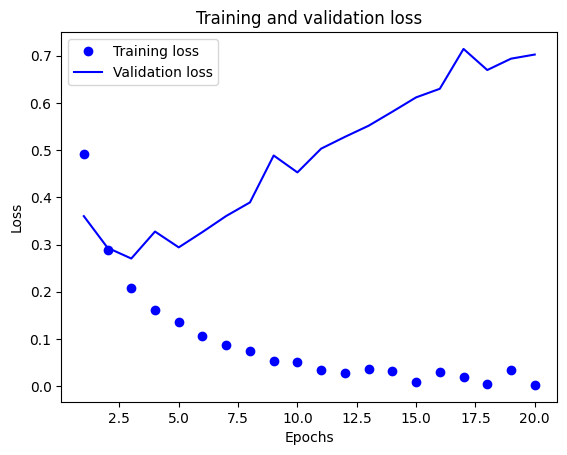

In [68]:
loss_values = history_dict_tanh["loss"]
val_loss_values = history_dict_tanh["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

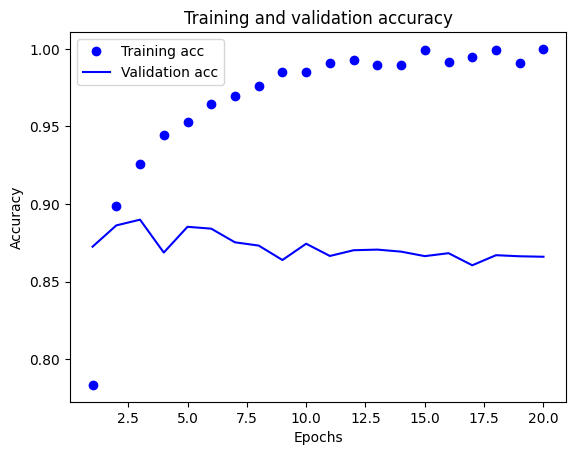

In [69]:
plt.clf()
acc = history_dict_tanh["accuracy"]
val_acc = history_dict_tanh["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [70]:
model_tanh.fit(train_dataset_1, train_dataset_2, epochs=8, batch_size=512)
binary_matrix_tanh = model_tanh.evaluate(test_dataset_1, test_data_2)
binary_matrix_tanh

Epoch 1/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.9411 - loss: 0.2894
Epoch 2/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.9604 - loss: 0.1434
Epoch 3/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9682 - loss: 0.1070
Epoch 4/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.9721 - loss: 0.0897
Epoch 5/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.9773 - loss: 0.0742
Epoch 6/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.9769 - loss: 0.0705
Epoch 7/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9850 - loss: 0.0569
Epoch 8/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9789 - loss: 0.0665
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8535 - loss: 0.6079


[0.599612832069397, 0.8537600040435791]

### **Adam Optimizer Function**

In [71]:
np.random.seed(123)
model_adam = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

model_adam.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

x_validation = train_dataset_1[:10000]
partial_train_dataset_1 = train_dataset_1[10000:]

y_val = train_dataset_2[:10000]
partial_train_dataset_2 = train_dataset_2[10000:]

np.random.seed(123)

history_adam = model_adam.fit(partial_train_dataset_1,
                    partial_train_dataset_2,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_validation, y_val))

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - accuracy: 0.6990 - loss: 0.6165 - val_accuracy: 0.8547 - val_loss: 0.4033
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.8923 - loss: 0.3308 - val_accuracy: 0.8830 - val_loss: 0.2999
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.9293 - loss: 0.2122 - val_accuracy: 0.8894 - val_loss: 0.2767
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - accuracy: 0.9536 - loss: 0.1535 - val_accuracy: 0.8874 - val_loss: 0.2822
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 55ms/step - accuracy: 0.9689 - loss: 0.1139 - val_accuracy: 0.8834 - val_loss: 0.2976
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - accuracy: 0.9788 - loss: 0.0852 - val_accuracy: 0.8827 - val_loss: 0.3198
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.9873 - loss: 0.0631 - val_accuracy: 0.8809 - val_loss: 0.3473
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.9931 - loss: 0.0464 - val_accuracy: 0.8784 - v

In [72]:
history_dict_adam = history_adam.history
history_dict_adam.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

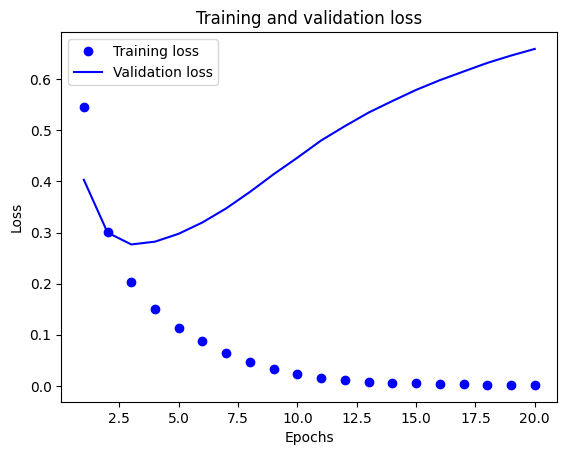

In [73]:
loss_values = history_dict_adam["loss"]
val_loss_values = history_dict_adam["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

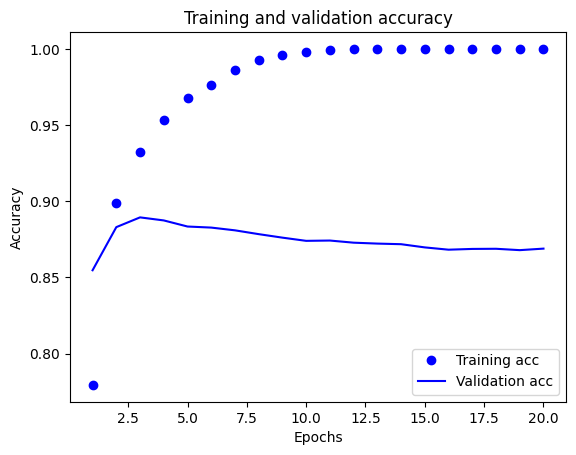

In [74]:
plt.clf()
acc = history_dict_adam["accuracy"]
val_acc = history_dict_adam["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [75]:
model_adam.fit(train_dataset_1, train_dataset_2, epochs=4, batch_size=512)
binary_matrix_adam = model_adam.evaluate(test_dataset_1, test_data_2)
binary_matrix_adam

Epoch 1/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.9450 - loss: 0.2408
Epoch 2/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.9721 - loss: 0.0972
Epoch 3/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.9852 - loss: 0.0568
Epoch 4/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.9930 - loss: 0.0329
782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8578 - loss: 0.5264


[0.5296986103057861, 0.8575599789619446]

### **Regularization**

In [76]:
from tensorflow.keras import regularizers
np.random.seed(123)
model_regularization = keras.Sequential([
    layers.Dense(16, activation="relu",kernel_regularizer=regularizers.l2(0.001)),
    layers.Dense(16, activation="relu",kernel_regularizer=regularizers.l2(0.001)),
    layers.Dense(1, activation="sigmoid")
])
model_regularization.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
np.random.seed(123)
history_model_regularization = model_regularization.fit(partial_train_dataset_1,
                    partial_train_dataset_2,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_validation, y_val))
history_dict_regularization = history_model_regularization.history
history_dict_regularization.keys()

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step - accuracy: 0.6741 - loss: 0.6740 - val_accuracy: 0.8516 - val_loss: 0.4908
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.8805 - loss: 0.4418 - val_accuracy: 0.8767 - val_loss: 0.3932
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.9066 - loss: 0.3357 - val_accuracy: 0.8823 - val_loss: 0.3532
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.9259 - loss: 0.2783 - val_accuracy: 0.8638 - val_loss: 0.3739
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.9323 - loss: 0.2501 - val_accuracy: 0.8889 - val_loss: 0.3296
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.9483 - loss: 0.2222 - val_accuracy: 0.8862 - val_loss: 0.3315
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.9520 - loss: 0.2072 - val_accuracy: 0.8767 - val_loss: 0.3608
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.9597 - loss: 0.1939 - val_accuracy: 0.8639 - v

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

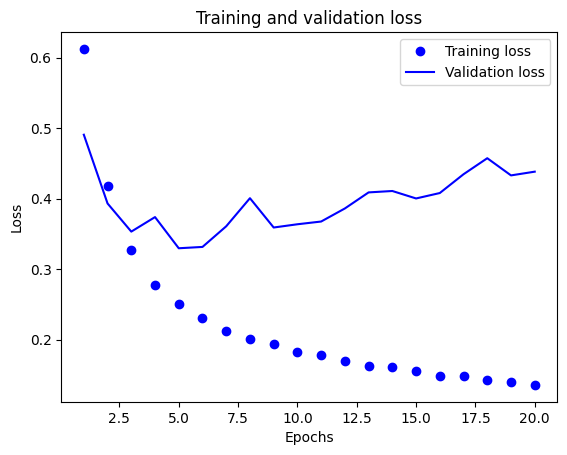

In [77]:
loss_values = history_dict_regularization["loss"]
val_loss_values = history_dict_regularization["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

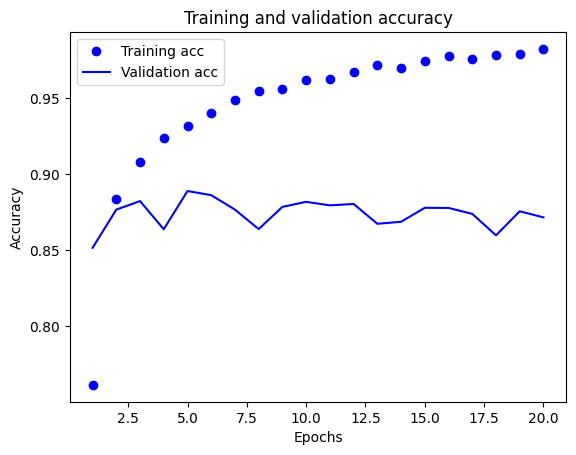

In [78]:
plt.clf()
acc = history_dict_regularization["accuracy"]
val_acc = history_dict_regularization["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [79]:
model_regularization.fit(train_dataset_1, train_dataset_2, epochs=8, batch_size=512)
binary_matrix_regularization = model_regularization.evaluate(test_dataset_1, test_data_2)
binary_matrix_regularization

Epoch 1/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.9402 - loss: 0.2483
Epoch 2/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.9520 - loss: 0.2031
Epoch 3/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.9624 - loss: 0.1821
Epoch 4/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.9618 - loss: 0.1754
Epoch 5/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.9632 - loss: 0.1690
Epoch 6/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.9706 - loss: 0.1602
Epoch 7/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.9688 - loss: 0.1593
Epoch 8/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.9675 - loss: 0.1605
782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8670 - loss: 0.4294


[0.42404553294181824, 0.8711199760437012]

**The model with regularization demonstrated steady improvement in training accuracy, reaching 96.75% with a loss of 0.1605 by Epoch 8. However, on the test set, it achieved an accuracy of 87.11% with a loss of 0.4240, indicating better generalization compared to previous models but still showing some overfitting. Further tuning, such as adjusting the regularization strength, may enhance performance.**

### **Dropout**

In [80]:
from tensorflow.keras import regularizers
np.random.seed(123)
model_Dropout = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(1, activation="sigmoid")
])
model_Dropout.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
np.random.seed(123)
history_model_Dropout = model_Dropout.fit(partial_train_dataset_1,
                    partial_train_dataset_2,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_validation, y_val))
history_dict_Dropout = history_model_Dropout.history
history_dict_Dropout.keys()

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - accuracy: 0.5469 - loss: 0.6809 - val_accuracy: 0.8037 - val_loss: 0.5729
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - accuracy: 0.7137 - loss: 0.5756 - val_accuracy: 0.8629 - val_loss: 0.4544
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.7898 - loss: 0.4831 - val_accuracy: 0.8755 - val_loss: 0.3748
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.8290 - loss: 0.4147 - val_accuracy: 0.8786 - val_loss: 0.3339
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.8644 - loss: 0.3601 - val_accuracy: 0.8830 - val_loss: 0.3125
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.8927 - loss: 0.3097 - val_accuracy: 0.8871 - val_loss: 0.2854
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.9062 - loss: 0.2768 - val_accuracy: 0.8820 - val_loss: 0.2841
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.9130 - loss: 0.2608 - val_accuracy: 0.8870 - v

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

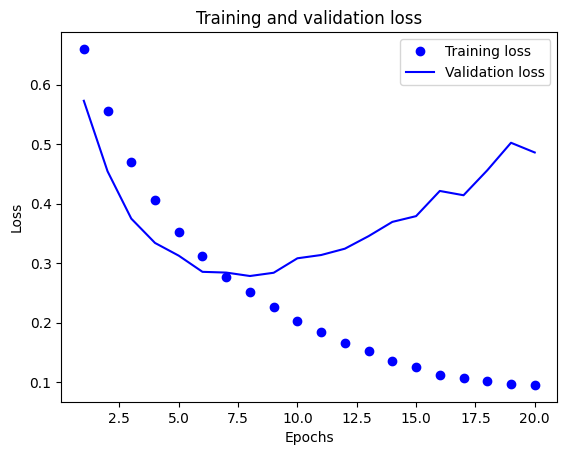

In [81]:
loss_values = history_dict_Dropout["loss"]
val_loss_values = history_dict_Dropout["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

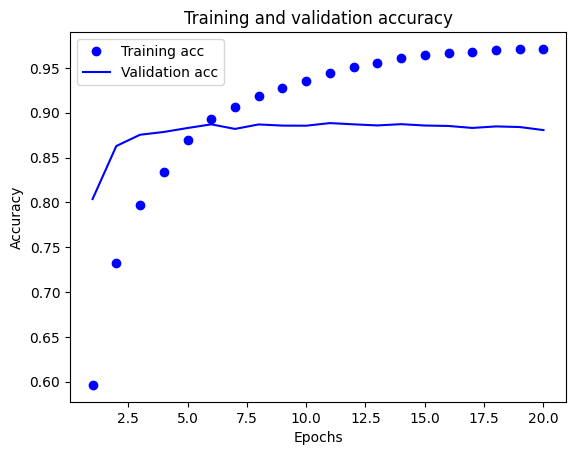

In [82]:
plt.clf()
acc = history_dict_Dropout["accuracy"]
val_acc = history_dict_Dropout["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [83]:
model_Dropout.fit(train_dataset_1, train_dataset_2, epochs=8, batch_size=512)
binary_matrix_Dropout = model_Dropout.evaluate(test_dataset_1, test_data_2)
binary_matrix_Dropout

Epoch 1/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9265 - loss: 0.2493
Epoch 2/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9341 - loss: 0.2052
Epoch 3/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9438 - loss: 0.1895
Epoch 4/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9462 - loss: 0.1668
Epoch 5/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9501 - loss: 0.1495
Epoch 6/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.9517 - loss: 0.1475
Epoch 7/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9506 - loss: 0.1412
Epoch 8/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.9554 - loss: 0.1299
782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8744 - loss: 0.4879


[0.4821183681488037, 0.8751999735832214]

**The model showed consistent improvement during training, reaching an accuracy of 95.54% with a loss of 0.1299 by Epoch 8. On the test set, it achieved 87.52% accuracy with a loss of 0.4821, indicating decent generalization but still exhibiting signs of overfitting. Further fine-tuning, such as adjusting regularization strength or dropout, could help enhance performance.**

**Training model with hyper tuned parameters**

In [84]:
from tensorflow.keras import regularizers
np.random.seed(123)
hyper_model = keras.Sequential([
    layers.Dense(32, activation="relu",kernel_regularizer=regularizers.l2(0.0001)),
    layers.Dropout(0.5),
    layers.Dense(32, activation="relu",kernel_regularizer=regularizers.l2(0.0001)),
    layers.Dropout(0.5),
    layers.Dense(16, activation="relu",kernel_regularizer=regularizers.l2(0.0001)),
    layers.Dropout(0.5),
    layers.Dense(1, activation="sigmoid")
])
hyper_model.compile(optimizer="rmsprop",
              loss="mse",
              metrics=["accuracy"])
np.random.seed(123)
history_model_Hyper = hyper_model.fit(partial_train_dataset_1,
                    partial_train_dataset_2,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_validation, y_val))
hyper_model_history_dict = history_model_Hyper.history
hyper_model_history_dict.keys()

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 51ms/step - accuracy: 0.5316 - loss: 0.2594 - val_accuracy: 0.7755 - val_loss: 0.2221
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.6811 - loss: 0.2225 - val_accuracy: 0.8436 - val_loss: 0.1516
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.7873 - loss: 0.1733 - val_accuracy: 0.8740 - val_loss: 0.1139
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.8455 - loss: 0.1373 - val_accuracy: 0.8792 - val_loss: 0.1032
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.8780 - loss: 0.1151 - val_accuracy: 0.8833 - val_loss: 0.1012
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.9035 - loss: 0.0998 - val_accuracy: 0.8798 - val_loss: 0.1055
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.9153 - loss: 0.0870 - val_accuracy: 0.8807 - val_loss: 0.1027
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.9254 - loss: 0.0785 - val_accuracy: 0.8830 - v

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

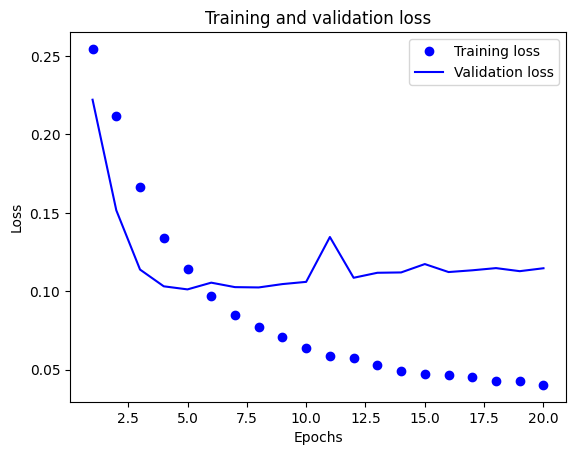

In [85]:
loss_values = hyper_model_history_dict["loss"]
val_loss_values = hyper_model_history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

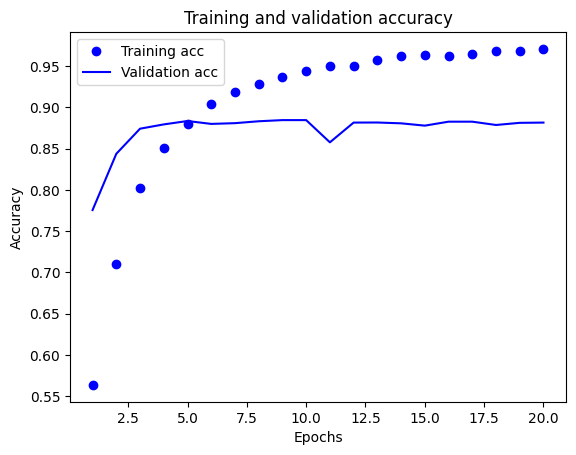

In [86]:
plt.clf()
acc = hyper_model_history_dict["accuracy"]
val_acc = hyper_model_history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [87]:
hyper_model.fit(train_dataset_1, train_dataset_2, epochs=8, batch_size=512)
binary_predictions = hyper_model.evaluate(test_dataset_1, test_data_2)
binary_predictions

Epoch 1/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.9282 - loss: 0.0737
Epoch 2/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.9342 - loss: 0.0683
Epoch 3/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9429 - loss: 0.0621
Epoch 4/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.9459 - loss: 0.0592
Epoch 5/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.9518 - loss: 0.0540
Epoch 6/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.9521 - loss: 0.0538
Epoch 7/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.9517 - loss: 0.0534
Epoch 8/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.9535 - loss: 0.0521
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8770 - loss: 0.1158


[0.11340228468179703, 0.8803600072860718]

### Summary

In [88]:
All_Models_Loss= np.array([binary_matrix_Dropout[0],binary_predictions[0],binary_mse[0],binary_matrix_regularization[0],binary_matrix_tanh[0]])*100
All_Models_Loss
All_Models_Accuracy= np.array([binary_matrix_Dropout[1],binary_predictions[1],binary_mse[1],binary_matrix_regularization[1],binary_matrix_tanh[1]])*100
All_Models_Accuracy
model_labels=['Model_Dropout','hyper_model','Model_MSE','model_regularization','model_tanh']
plt.clf()

<Figure size 640x480 with 0 Axes>

### Compilation

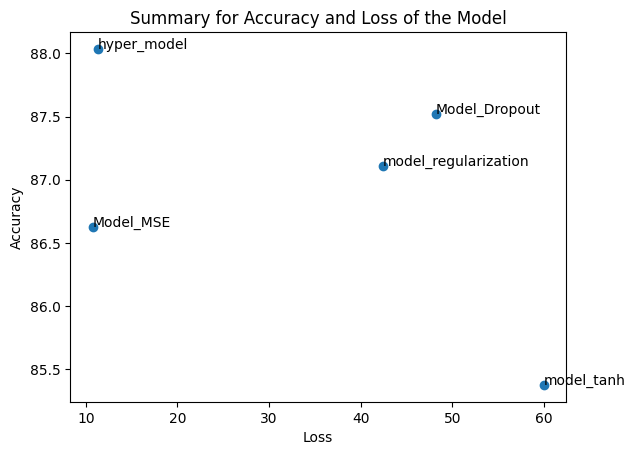

In [89]:
fig, ax = plt.subplots()
ax.scatter(All_Models_Loss,All_Models_Accuracy)
for i, txt in enumerate(model_labels):
    ax.annotate(txt, (All_Models_Loss[i],All_Models_Accuracy[i] ))
plt.title("Summary for Accuracy and Loss of the Model")
plt.ylabel("Accuracy")
plt.xlabel("Loss")

plt.show()

## **Summary**

**Analysis of Model Performance: Accuracy vs. Loss**
The graph presents a comparative evaluation of different model variations based on accuracy and loss metrics. Each point represents a model with specific optimization techniques, illustrating their effectiveness in balancing accuracy and generalization.

### **Key Insights:**

**Hyperparameter-Tuned Model (hyper_model)**

Achieves the highest accuracy (~88%) with the lowest loss, making it the best-performing model.
This suggests that optimized hyperparameters significantly enhance both accuracy and generalization.

**Model with Mean Squared Error (Model_MSE)**

Demonstrates good accuracy (~86.5%) and the lowest loss, highlighting the effectiveness of MSE as a loss function in stabilizing training and reducing overfitting.

**Dropout Regularization (Model_Dropout)**

Achieves slightly higher accuracy (~87.5%) than other regularized models but with a moderate loss.
Indicates that dropout helps improve generalization while maintaining strong performance.

**L2 Regularization (model_regularization)**

Attains an accuracy of ~87% with slightly higher loss compared to the dropout model.
Suggests that L2 regularization aids in controlling overfitting but does not outperform hyperparameter tuning or dropout.

**Tanh Activation Model (model_tanh)**

Yields the lowest accuracy (85.5%) and the highest loss (~60), making it the least effective model.
Implies that ReLU-based architectures were more efficient than tanh for this dataset.


### **Conclusion:**
The hyperparameter-tuned model outperforms all others, achieving the highest
accuracy with the lowest loss.
Dropout and L2 regularization improve generalization, though dropout offers slightly better results.
MSE as a loss function stabilizes training, reducing loss while maintaining competitive accuracy.
Tanh activation underperforms, reinforcing the superiority of ReLU-based architectures for this task.
For further optimization, combining hyperparameter tuning with dropout or L2 regularization could enhance performance while mitigating overfitting.